In [1]:
import numpy as np
import pandas as pd
from root_pandas import read_root
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.16/00


In [2]:
int1 = read_root("../../Data/run1_intrinsics_rerun_stripmine.root","FinalVertexVariables")
int2 = read_root("../../Data/mcc9_v29e_dl_run2_bnb_intrinsics_nue_overlay_finalbdt.root","dlana/FinalVertexVariables")
int3 = read_root("../../Data/mcc9_v29e_run3b_bnb_intrinsic_nue_overlay_nocrtremerge.root","dlana/FinalVertexVariables")


In [3]:
inttot = pd.concat((int1,int2,int3))

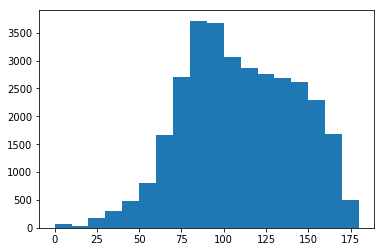

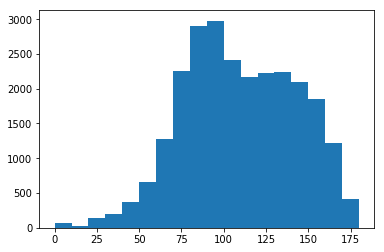

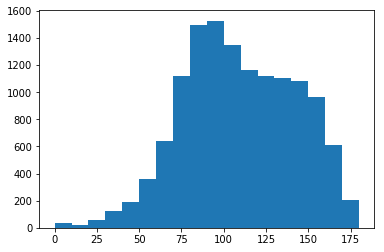

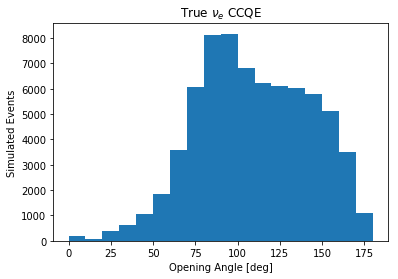

[ 176.   87.  369.  621. 1044. 1829. 3581. 6074. 8110. 8173. 6816. 6212.
 6105. 6035. 5794. 5107. 3517. 1107.]
0.002487386406998601


In [4]:
plt.hist(int1.query('PassSimpleCuts==1 and interactionType==1001')['OpenAng']*180/np.pi,range=(0,180),bins=18)
plt.show()
plt.hist(int2.query('PassSimpleCuts==1 and interactionType==1001')['OpenAng']*180/np.pi,range=(0,180),bins=18)
plt.show()
plt.hist(int3.query('PassSimpleCuts==1 and interactionType==1001')['OpenAng']*180/np.pi,range=(0,180),bins=18)
plt.show()

n,_,_ = plt.hist(inttot.query('PassSimpleCuts==1 and interactionType==1001 and (MC_parentPDG==12 or MC_parentPDG==-12)')['OpenAng']*180/np.pi,range=(0,180),bins=18)
plt.xlabel('Opening Angle [deg]')
plt.ylabel('Simulated Events')
plt.title(r'True $\nu_e$ CCQE')
plt.show()
print(n)
print(n[0]/sum(n))




# Efficiency

In [5]:
from SelectionHelper import MakeAvgBDTcut
import ROOT as rt

In [75]:
bins = np.arange(0,3001,50)
binc = 0.5*(bins[:-1]+bins[1:])
num1pq = pd.read_parquet('Parquets/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/SelectionMode0_intrinsics_fset12_run1_nopi0weight.parquet.gzip')
num2pq = pd.read_parquet('Parquets/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/SelectionMode0_intrinsics_fset12_run2_nopi0weight.parquet.gzip')
num3pq = pd.read_parquet('Parquets/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/SelectionMode0_intrinsics_fset12_run3_nopi0weight.parquet.gzip')
MakeAvgBDTcut(num1pq,0.95,20)
MakeAvgBDTcut(num2pq,0.95,20)
MakeAvgBDTcut(num3pq,0.95,20)
numtotpq = pd.concat((num1pq,num2pq,num3pq))
w1 = weights=num1pq['GenieWeight']*(num1pq['sigprob']>0.95)*(num1pq['interactionType']==1001)*(np.abs(num1pq['parentPDG'])==12)
w2 = weights=num2pq['GenieWeight']*(num2pq['sigprob']>0.95)*(num2pq['interactionType']==1001)*(np.abs(num2pq['parentPDG'])==12)
w3 = weights=num3pq['GenieWeight']*(num3pq['sigprob']>0.95)*(num3pq['interactionType']==1001)*(np.abs(num3pq['parentPDG'])==12)
wtot = weights=numtotpq['GenieWeight']*(numtotpq['sigprob']>0.95)*(numtotpq['interactionType']==1001)*(np.abs(numtotpq['parentPDG'])==12)

num1,_ = np.histogram(num1pq['EnuTrue'],bins=bins,weights=w1)
num2,_ = np.histogram(num2pq['EnuTrue'],bins=bins,weights=w2)
num3,_ = np.histogram(num3pq['EnuTrue'],bins=bins,weights=w3)
numtot,_ = np.histogram(numtotpq['EnuTrue'],bins=bins,weights=wtot)

numv1,_ = np.histogram(num1pq['EnuTrue'],bins=bins,weights=w1**2)
numv2,_ = np.histogram(num2pq['EnuTrue'],bins=bins,weights=w2**2)
numv3,_ = np.histogram(num3pq['EnuTrue'],bins=bins,weights=w3**2)
numvtot,_ = np.histogram(numtotpq['EnuTrue'],bins=bins,weights=wtot**2)
nume1 = np.sqrt(numv1)
nume2 = np.sqrt(numv2)
nume3 = np.sqrt(numv3)
numetot = np.sqrt(numvtot)

dem1f = rt.TFile('../aux/effden_run1_nue_-1_4650.root')
dem1h = dem1f.Get('Efficiency_Denominator_Weighted_Run1')
dem2f = rt.TFile('../aux/effden_run2_nue_-1_5940.root')
dem2h = dem2f.Get('Efficiency_Denominator_Weighted_Run2')
dem3f = rt.TFile('../aux/effden_run3_nue_-1_2240.root')
dem3h = dem3f.Get('Efficiency_Denominator_Weighted_Run3')
demtoth = dem1h.Clone()
demtoth.Add(dem2h)
demtoth.Add(dem3h)

dem1 = np.array([dem1h.GetBinContent(i) for i in range(len(binc)+2)])[1:-1]
dem2 = np.array([dem2h.GetBinContent(i) for i in range(len(binc)+2)])[1:-1]
dem3 = np.array([dem3h.GetBinContent(i) for i in range(len(binc)+2)])[1:-1]
demtot = np.array([demtoth.GetBinContent(i) for i in range(len(binc)+2)])[1:-1]
deme1 = np.array([dem1h.GetBinError(i) for i in range(len(binc)+2)])[1:-1]
deme2 = np.array([dem2h.GetBinError(i) for i in range(len(binc)+2)])[1:-1]
deme3 = np.array([dem3h.GetBinError(i) for i in range(len(binc)+2)])[1:-1]
demetot = np.array([demtoth.GetBinError(i) for i in range(len(binc)+2)])[1:-1]


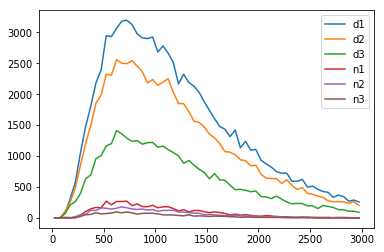

In [59]:
plt.plot(binc,dem1,label='d1')
plt.plot(binc,dem2,label='d2')
plt.plot(binc,dem3,label='d3')
plt.plot(binc,num1,label='n1')
plt.plot(binc,num2,label='n2')
plt.plot(binc,num3,label='n3')
plt.legend()
plt.show()

[ 225.  275.  325.  375.  425.  475.  525.  575.  625.  675.  725.  775.
  825.  875.  925.  975. 1025. 1075. 1125. 1175.]
0.06592755556454813


/home/nwkamp/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.
/home/nwkamp/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  
/home/nwkamp/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nwkamp/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in divide
  after removing the cwd from sys.path.
/home/nwkamp/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in divide
  """
/home/nwkamp/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in divide
  
/home/nwkamp/.local/lib/python2.7/site-packages/ipykernel_launcher

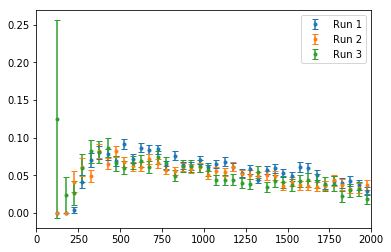

/home/nwkamp/.local/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in divide


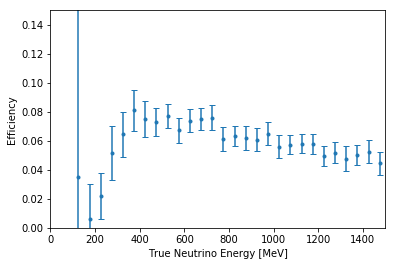

In [85]:
r1 = num1/dem1
e1 = r1*np.sqrt(nume1**2/num1**2 + deme1**2/dem1**2)
r2 = num2/dem2
e2 = r2*np.sqrt(nume2**2/num2**2 + deme2**2/dem2**2)
r3 = num3/dem3
e3 = r3*np.sqrt(nume3**2/num3**2 + deme3**2/dem3**2)
rtot = numtot/demtot
print(binc[4:24])
print(sum(numtot[4:24])/sum(demtot[4:24]))
etot = rtot*np.sqrt(numetot**2/numtot**2 + demetot**2/demtot**2)

plt.errorbar(binc,num1/dem1,label='Run 1',fmt='.',capsize=3,yerr=e1)
plt.errorbar(binc,num2/dem2,label='Run 2',fmt='.',capsize=3,yerr=e2)
plt.errorbar(binc,num3/dem3,label='Run 3',fmt='.',capsize=3,yerr=e3)
plt.xlim(0,2000)
plt.legend()
plt.show()

plt.errorbar(binc,numtot/demtot,fmt='.',capsize=3,yerr=e3)
plt.xlim(0,1500)
plt.ylim(0,0.15)
plt.xlabel('True Neutrino Energy [MeV]')
plt.ylabel('Efficiency')
plt.show()